SURESH KANNA P
18MIS1067
SWE4012
MACHINE LEARNING 
DIGITAL ASSIGNMENT

Import the required packages and dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
from google.colab import drive
drive.mount('/content/drive')

#4/1AX4XfWiM5bc93Ch58I9bbZt-aoujPOFSzZqRRrO3zUe7cOrfBW6AXBrWJY0

Mounted at /content/drive


In [3]:
dataset=pd.read_csv('/content/drive/My Drive/KDD/kddcup99.csv')

In [4]:
dataset.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,lnum_compromised,lroot_shell,lsu_attempted,lnum_root,lnum_file_creations,lnum_shells,lnum_access_files,lnum_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,181,5450,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,9,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal
1,0,tcp,http,SF,239,486,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,19,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,29,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,39,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,49,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494020 entries, 0 to 494019
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     494020 non-null  int64  
 1   protocol_type                494020 non-null  object 
 2   service                      494020 non-null  object 
 3   flag                         494020 non-null  object 
 4   src_bytes                    494020 non-null  int64  
 5   dst_bytes                    494020 non-null  int64  
 6   land                         494020 non-null  int64  
 7   wrong_fragment               494020 non-null  int64  
 8   urgent                       494020 non-null  int64  
 9   hot                          494020 non-null  int64  
 10  num_failed_logins            494020 non-null  int64  
 11  logged_in                    494020 non-null  int64  
 12  lnum_compromised             494020 non-null  int64  
 13 

In [6]:
dataset.shape

(494020, 42)

In [7]:
y = dataset['label']
print('Class labels:', np.unique(y))

Class labels: ['back' 'buffer_overflow' 'ftp_write' 'guess_passwd' 'imap' 'ipsweep'
 'land' 'loadmodule' 'multihop' 'neptune' 'nmap' 'normal' 'perl' 'phf'
 'pod' 'portsweep' 'rootkit' 'satan' 'smurf' 'spy' 'teardrop'
 'warezclient' 'warezmaster']


In [8]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(y)
list(le.classes_)
y = le.transform(y)

In [9]:
dataset["protocol_type"] = le.fit_transform(dataset["protocol_type"].astype(str))
dataset["service"] = le.fit_transform(dataset["service"].astype(str))
dataset["flag"] = le.fit_transform(dataset["flag"].astype(str))

In [10]:
dataset.head(5)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,lnum_compromised,lroot_shell,lsu_attempted,lnum_root,lnum_file_creations,lnum_shells,lnum_access_files,lnum_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,1,22,9,181,5450,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,9,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal
1,0,1,22,9,239,486,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,19,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal
2,0,1,22,9,235,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,29,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal
3,0,1,22,9,219,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,39,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal
4,0,1,22,9,217,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,49,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal


In [11]:
X = dataset.loc[:, dataset.columns != 'label']
print('X: ', X)

X:          duration  protocol_type  ...  dst_host_rerror_rate  dst_host_srv_rerror_rate
0              0              1  ...                   0.0                       0.0
1              0              1  ...                   0.0                       0.0
2              0              1  ...                   0.0                       0.0
3              0              1  ...                   0.0                       0.0
4              0              1  ...                   0.0                       0.0
...          ...            ...  ...                   ...                       ...
494015         0              1  ...                   0.0                       0.0
494016         0              1  ...                   0.0                       0.0
494017         0              1  ...                   0.0                       0.0
494018         0              1  ...                   0.0                       0.0
494019         0              1  ...                   0.0   

In [12]:
y = dataset.loc[:, dataset.columns== 'label']
print('Y: ', y)

Y:           label
0       normal
1       normal
2       normal
3       normal
4       normal
...        ...
494015  normal
494016  normal
494017  normal
494018  normal
494019  normal

[494020 rows x 1 columns]


In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)


##STOCHASTIC GRADIENT DESCENT

In [65]:
 from sklearn.linear_model import SGDClassifier

In [68]:

clf = SGDClassifier(loss="hinge", penalty="l2", max_iter=5)

In [69]:
clf.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


SGDClassifier(max_iter=5)

In [70]:
SGDClassifier(max_iter=5)


SGDClassifier(max_iter=5)

In [71]:
y_pred = clf.predict(X_test)

In [72]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)
print("The Confusion Matrix for this model is:",cm)

The Confusion Matrix for this model is: [[  641     0     0     0     0     0     0     0     0     0     0    20
      0     0     0     0     0     0     0     0     0     0     0]
 [    0     7     0     0     0     0     0     0     0     0     0     2
      0     0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0     0     2
      0     0     0     0     0     0     0     0     0     0     0]
 [    0     0     0    16     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0     0     4
      0     0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0   337     0     0     0     0     0    37
      0     0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     6     0     0     0     0     0
      0     0     0     0   

In [73]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                 precision    recall  f1-score   support

           back       0.99      0.97      0.98       661
buffer_overflow       0.58      0.78      0.67         9
      ftp_write       0.00      0.00      0.00         2
   guess_passwd       0.94      1.00      0.97        16
           imap       0.00      0.00      0.00         4
        ipsweep       0.97      0.90      0.94       374
           land       0.86      1.00      0.92         6
     loadmodule       0.00      0.00      0.00         3
       multihop       0.00      0.00      0.00         2
        neptune       1.00      1.00      1.00     32160
           nmap       0.77      0.43      0.56        69
         normal       0.99      1.00      0.99     29183
           perl       0.00      0.00      0.00         1
            phf       0.00      0.00      0.00         1
            pod       1.00      0.37      0.54        79
      portsweep       0.99      0.87      0.93       312
        rootkit       0.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [74]:
from sklearn.metrics import f1_score
f1score = f1_score(y_test,y_pred, average='micro')
print("The F1 Score for this model is:",f1score)

The F1 Score for this model is: 0.9970716435232042


In [75]:
 from sklearn.metrics import precision_score
 ps=precision_score(y_test, y_pred, average='macro')
 print("The Precision Score for this model is:",ps)


The Precision Score for this model is: 0.6074001735640824


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [76]:
from sklearn.metrics import recall_score
rs=recall_score(y_test, y_pred, average='macro')
print("The Recall Score for this model is:",rs)


The Recall Score for this model is: 0.5561261454562282


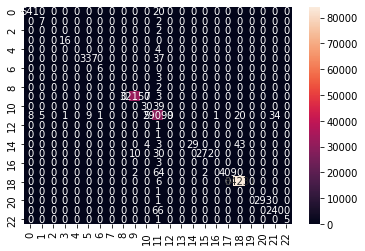

In [77]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
f = sns.heatmap(cm, annot=True, fmt='d')

In [78]:
from sklearn import metrics 
print("The Accuarcy of the Stochastic gradient descent model is: ", metrics.accuracy_score(y_test, y_pred))

The Accuarcy of the Stochastic gradient descent model is:  0.9970716435232042


##PRINCIPLE COMPONENT AMALYSIS--PCA

In [26]:
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
import seaborn as sb

In [27]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [28]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state = 0)

classifier.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(random_state=0)

In [29]:
y_pred = classifier.predict(X_test)

In [30]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)
print("The Confusion Matrix for this model is:",cm)

The Confusion Matrix for this model is: [[  659     0     0     0     0     0     0     0     0     0     0     2
      0     0     0     0     0     0     0     0     0     0     0]
 [    0     5     0     0     0     0     0     2     0     0     0     2
      0     0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0     0     2
      0     0     0     0     0     0     0     0     0     0     0]
 [    0     0     0    16     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     3     0     0     0     0     0     0     1
      0     0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0   362     0     0     0     0     2    10
      0     0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     6     0     0     0     0     0
      0     0     0     0   

In [31]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                 precision    recall  f1-score   support

           back       0.98      1.00      0.99       661
buffer_overflow       1.00      0.56      0.71         9
      ftp_write       0.00      0.00      0.00         2
   guess_passwd       1.00      1.00      1.00        16
           imap       1.00      0.75      0.86         4
        ipsweep       0.98      0.97      0.97       374
           land       0.86      1.00      0.92         6
     loadmodule       0.00      0.00      0.00         3
       multihop       0.00      0.00      0.00         2
        neptune       1.00      1.00      1.00     32160
           nmap       0.86      0.80      0.83        69
         normal       1.00      1.00      1.00     29183
           perl       1.00      1.00      1.00         1
            phf       1.00      1.00      1.00         1
            pod       1.00      0.96      0.98        79
      portsweep       0.98      0.96      0.97       312
        rootkit       0.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [32]:
from sklearn.metrics import f1_score
f1score = f1_score(y_test,y_pred, average='micro')
print("The F1 Score for this model is:",f1score)

The F1 Score for this model is: 0.9986572743343725


In [33]:
 from sklearn.metrics import precision_score
 ps=precision_score(y_test, y_pred, average='macro')
 print("The Precision Score for this model is:",ps)


The Precision Score for this model is: 0.7620217936018979


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [34]:
from sklearn.metrics import recall_score
rs=recall_score(y_test, y_pred, average='macro')
print("The Recall Score for this model is:",rs)


The Recall Score for this model is: 0.7259779139163272


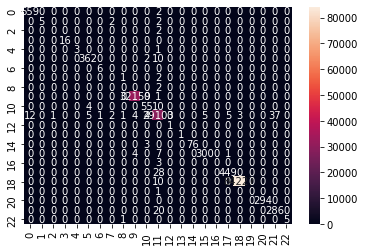

In [35]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
f = sns.heatmap(cm, annot=True, fmt='d')

In [36]:
from sklearn import metrics 
print("The Accuarcy of the PCA model is: ", metrics.accuracy_score(y_test, y_pred))

The Accuarcy of the PCA model is:  0.9986572743343725


##RANDOM FOREST

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [38]:


clf = RandomForestClassifier(max_depth=2, random_state=0)

In [39]:


clf.fit(X_train, y_train)
 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(max_depth=2, random_state=0)

In [40]:


y_pred = clf.predict(X_test)

In [41]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)
print("The Confusion Matrix for this model is:",cm)

The Confusion Matrix for this model is: [[    0     0     0     0     0     0     0     0     0     0     0   661
      0     0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0     0     9
      0     0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0     0     2
      0     0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0     0    16
      0     0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0     0     4
      0     0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0     0   374
      0     0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     1     0     5
      0     0     0     0   

In [42]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                 precision    recall  f1-score   support

           back       0.00      0.00      0.00       661
buffer_overflow       0.00      0.00      0.00         9
      ftp_write       0.00      0.00      0.00         2
   guess_passwd       0.00      0.00      0.00        16
           imap       0.00      0.00      0.00         4
        ipsweep       0.00      0.00      0.00       374
           land       0.00      0.00      0.00         6
     loadmodule       0.00      0.00      0.00         3
       multihop       0.00      0.00      0.00         2
        neptune       0.98      1.00      0.99     32160
           nmap       0.00      0.00      0.00        69
         normal       0.93      1.00      0.96     29183
           perl       0.00      0.00      0.00         1
            phf       0.00      0.00      0.00         1
            pod       0.00      0.00      0.00        79
      portsweep       0.00      0.00      0.00       312
        rootkit       0.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [43]:
from sklearn.metrics import f1_score
f1score = f1_score(y_test,y_pred, average='micro')
print("The F1 Score for this model is:",f1score)

The F1 Score for this model is: 0.9819507982132977


In [44]:
 from sklearn.metrics import precision_score
 ps=precision_score(y_test, y_pred, average='macro')
 print("The Precision Score for this model is:",ps)


The Precision Score for this model is: 0.12675516355754055


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [45]:
from sklearn.metrics import recall_score
rs=recall_score(y_test, y_pred, average='macro')
print("The Recall Score for this model is:",rs)


The Recall Score for this model is: 0.13037637729808643


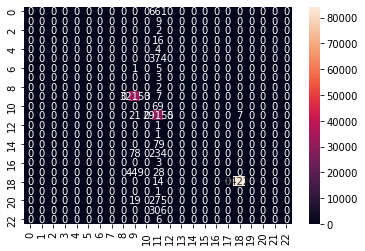

In [46]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
f = sns.heatmap(cm, annot=True, fmt='d')

In [47]:
from sklearn import metrics 
print("The Accuarcy of the Random Forest model is: ", metrics.accuracy_score(y_test, y_pred))

The Accuarcy of the Random Forest model is:  0.9819507982132977


##GRADIENT BOOSTING CLASSIFIER

In [50]:
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier

In [51]:
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=1, random_state=0).fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [55]:
clf.fit(X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(max_depth=1, random_state=0)

In [57]:
y_pred = clf.predict(X_test) 


In [58]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)
print("The Confusion Matrix for this model is:",cm)

The Confusion Matrix for this model is: [[  659     0     0     0     0     0     0     0     0     0     0     2
      0     0     0     0     0     0     0     0     0     0     0]
 [    0     7     0     0     0     0     0     0     0     0     0     1
      0     0     0     0     0     0     0     0     0     0     1]
 [    0     0     0     0     0     0     0     0     0     0     0     2
      0     0     0     0     0     0     0     0     0     0     0]
 [    0     0     0    16     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     3     0     0     0     0     0     0     1
      0     0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0   313     0     0     0     0     0    29
      0     0     0     0     0    32     0     0     0     0     0]
 [    0     0     0     0     0     0     6     0     0     0     0     0
      0     0     0     0   

In [59]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                 precision    recall  f1-score   support

           back       1.00      1.00      1.00       661
buffer_overflow       0.39      0.78      0.52         9
      ftp_write       0.00      0.00      0.00         2
   guess_passwd       0.89      1.00      0.94        16
           imap       0.09      0.75      0.16         4
        ipsweep       0.91      0.84      0.87       374
           land       0.86      1.00      0.92         6
     loadmodule       0.00      0.00      0.00         3
       multihop       0.17      0.50      0.25         2
        neptune       1.00      1.00      1.00     32160
           nmap       0.00      0.00      0.00        69
         normal       0.98      0.99      0.99     29183
           perl       0.00      0.00      0.00         1
            phf       0.00      0.00      0.00         1
            pod       0.21      0.96      0.34        79
      portsweep       0.00      0.00      0.00       312
        rootkit       0.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [60]:
from sklearn.metrics import f1_score
f1score = f1_score(y_test,y_pred, average='micro')
print("The F1 Score for this model is:",f1score)

The F1 Score for this model is: 0.9919368986410807


In [61]:
 from sklearn.metrics import precision_score
 ps=precision_score(y_test, y_pred, average='macro')
 print("The Precision Score for this model is:",ps)


The Precision Score for this model is: 0.3976142434956237


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [62]:
from sklearn.metrics import recall_score
rs=recall_score(y_test, y_pred, average='macro')
print("The Recall Score for this model is:",rs)


The Recall Score for this model is: 0.5213891538419242


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


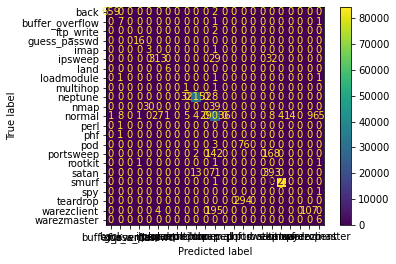

In [63]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf, X_test, y_test) 
plt.show()

In [64]:
from sklearn import metrics 
print("The Accuarcy of the Gradient Boosting Classifier  model is: ", metrics.accuracy_score(y_test, y_pred))

The Accuarcy of the Gradient Boosting Classifier  model is:  0.9919368986410807


##CONCLUSION

1.The Accuarcy of the Stochastic gradient descent model is:  0.9970716435232042

2.The Accuarcy of the PCA model is:  0.9986572743343725

3.The Accuarcy of the Random Forest model is:  0.9819507982132977

The Accuarcy of the Gradient Boosting Classifier  model is:  0.9919368986410807

In terms of accuracy, PCM and SGD has good accuracy when comapred to other two algorithms